1. Import Library dan Muat Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


2. Pra-Pengolahan Data

In [2]:
# Muat dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisasi data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Ubah data menjadi bentuk vektor (Flatten)
input_shape = 784  # 28x28 menjadi vektor 1D (784,)
x_train = x_train.reshape(-1, input_shape)
x_test = x_test.reshape(-1, input_shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


3. Pemilihan Fitur dan Arsitektur ANN

In [3]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Kompilasi Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


d:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4. Training Model

In [4]:
# Melatih model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8649 - loss: 0.4684 - val_accuracy: 0.9582 - val_loss: 0.1360
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9646 - loss: 0.1176 - val_accuracy: 0.9682 - val_loss: 0.1059
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9769 - loss: 0.0748 - val_accuracy: 0.9722 - val_loss: 0.0913
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9836 - loss: 0.0531 - val_accuracy: 0.9744 - val_loss: 0.0916
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9861 - loss: 0.0424 - val_accuracy: 0.9760 - val_loss: 0.0895
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9901 - loss: 0.0315 - val_accuracy: 0.9722 - val_loss: 0.1017
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9907 - loss: 0.0274 - val_accuracy: 0.9743 - val_loss: 0.1030
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9923 - loss: 0.0223 - 

5. Evaluasi Model

In [5]:
# Evaluasi model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9711 - loss: 0.1187
Test accuracy: 0.9735


6. Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


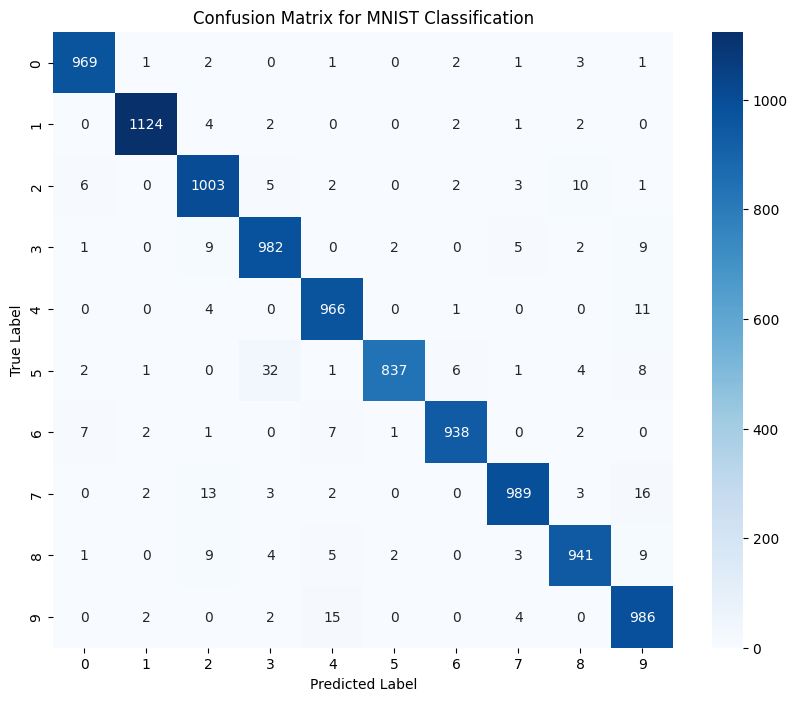

In [6]:
# Prediksi pada data uji
y_pred = np.argmax(model.predict(x_test), axis=1)

# Hitung Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()
